In [1]:
import torch
import torch_geometric as pyg
import matplotlib.pyplot as plt
import networkx as nx
from torch_sparse import spspmm

Graph of the human skeleton

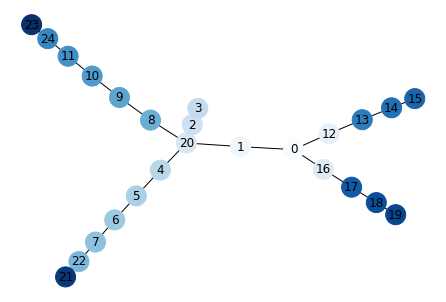

In [2]:
skeleton = [(1, 2), (2, 21), (3, 21), (4, 3), (5, 21), (6, 5), (7, 6),
             (8, 7), (9, 21), (10, 9), (11, 10), (12, 11), (13, 1),
             (14, 13), (15, 14), (16, 15), (17, 1), (18, 17), (19, 18),
             (20, 19), (22, 23), (23, 8), (24, 25), (25, 12)]
outward = [(j, i) for (i, j) in skeleton]
skeleton = skeleton + outward
sk = torch.tensor(skeleton).t() - 1
# plot skeleton
g = nx.Graph()   # undirected graph
dim = sk.shape[1]
t = pyg.utils.to_networkx(pyg.data.Data(torch.ones(dim), sk)) # directed graph
g.add_edges_from(t.edges)
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=400, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

See skeleton (adjacency matrix) $$S$$ as a sparse matrix, and the one-hop path of skeleton is $$S^2$$

In [3]:
sk = pyg.utils.from_networkx(t)
sk = sk.edge_index
print(sk)
dim = sk.shape[1]
val = torch.ones(dim)
# A^2: sk_eleton s_quare
idxc, valc = spspmm(sk, val, sk, val, 25, 25, 25)
idxc, valc

tensor([[ 0,  0,  0,  1,  1,  2,  2,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,
          9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17, 17, 18,
         18, 19, 20, 20, 20, 20, 21, 22, 22, 23, 24, 24],
        [ 1, 12, 16, 20,  0, 20,  3,  2, 20,  5,  4,  6,  5,  7,  6, 22, 20,  9,
          8, 10,  9, 11, 10, 24,  0, 13, 12, 14, 13, 15, 14,  0, 17, 16, 18, 17,
         19, 18,  1,  2,  4,  8, 22,  7, 21, 24, 11, 23]])


(tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,
           4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,
           9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15,
          15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 20, 20, 21,
          21, 22, 22, 23, 23, 24, 24],
         [ 0, 13, 17, 20,  1,  2,  4,  8, 12, 16,  1,  2,  4,  8,  3, 20,  1,  2,
           4,  6,  8,  5,  7, 20,  4,  6, 22,  5,  7, 21,  1,  2,  4,  8, 10,  9,
          11, 20,  8, 10, 24,  9, 11, 23,  1, 12, 14, 16,  0, 13, 15, 12, 14, 13,
          15,  1, 12, 16, 18,  0, 17, 19, 16, 18, 17, 19,  0,  3,  5,  9, 20,  7,
          21,  6, 22, 11, 23, 10, 24]]),
 tensor([3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1.,
         2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2.,
         1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 1., 2., 1., 1., 2., 1.,
         1., 1., 1., 

construct the graph for visualization

In [4]:
g2 = pyg.data.Data(edge_index=idxc)
t = pyg.utils.to_networkx(g2)
g2 = nx.Graph()
g2.add_edges_from(t.edges)

/Users/shi.feng/.pyenv/versions/3.7.7/lib/python3.7/site-packages/torch_geometric/data/data.py:198: UserWarning: The number of nodes in your data object can only be inferred by its edge indices, and hence may result in unexpected batch-wise behavior, e.g., in case there exists isolated nodes. Please consider explicitly setting the number of nodes for this data object by assigning it to data.num_nodes.
  warnings.warn(__num_nodes_warn_msg__.format('edge'))


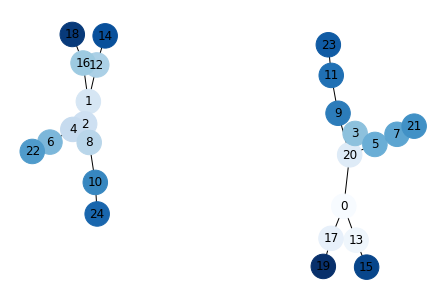

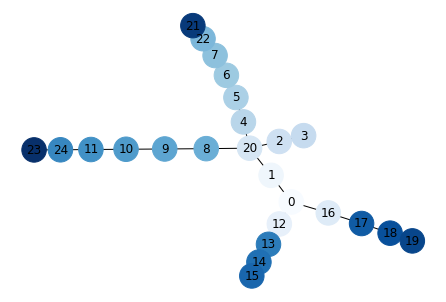

In [5]:
pos = nx.spring_layout(g2, iterations=100)
nx.draw(g2, pos, node_color=range(len(g2.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()
# The original skeleton
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

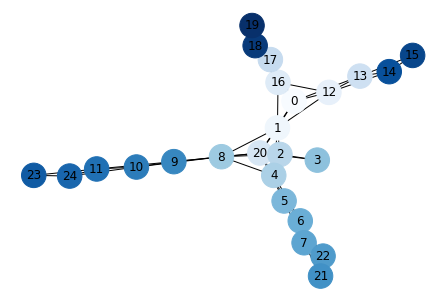

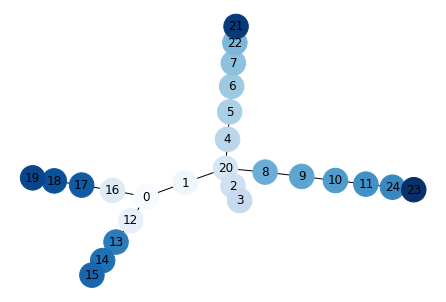

In [6]:
# put S and S^2 into one graph
gm = nx.Graph()
gm.add_edges_from(g.edges)
gm.add_edges_from(g2.edges)
pos = nx.spring_layout(gm, iterations=100)
nx.draw(gm, pos, node_color=range(len(gm.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(gm, pos)
plt.show()
# The original skeleton
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

In [7]:
from models.utils import power_adj

In [8]:
sks = power_adj(sk, 25, 2)

In [9]:
print(sks)

tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,
          4,  4,  4,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  9,
          9,  9, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 14, 14, 15,
         15, 16, 16, 16, 16, 17, 17, 17, 18, 18, 19, 19, 20, 20, 20, 20, 20, 21,
         21, 22, 22, 23, 23, 24, 24],
        [ 0, 13, 17, 20,  1,  2,  4,  8, 12, 16,  1,  2,  4,  8,  3, 20,  1,  2,
          4,  6,  8,  5,  7, 20,  4,  6, 22,  5,  7, 21,  1,  2,  4,  8, 10,  9,
         11, 20,  8, 10, 24,  9, 11, 23,  1, 12, 14, 16,  0, 13, 15, 12, 14, 13,
         15,  1, 12, 16, 18,  0, 17, 19, 16, 18, 17, 19,  0,  3,  5,  9, 20,  7,
         21,  6, 22, 11, 23, 10, 24]])


/Users/shi.feng/.pyenv/versions/3.7.7/lib/python3.7/site-packages/torch_geometric/data/data.py:198: UserWarning: The number of nodes in your data object can only be inferred by its edge indices, and hence may result in unexpected batch-wise behavior, e.g., in case there exists isolated nodes. Please consider explicitly setting the number of nodes for this data object by assigning it to data.num_nodes.
  warnings.warn(__num_nodes_warn_msg__.format('edge'))


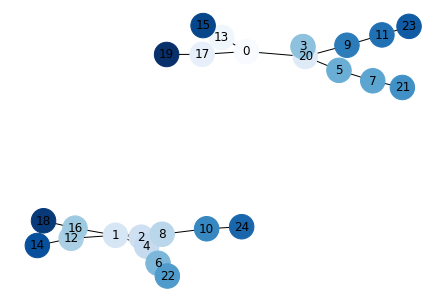

In [10]:
g2 = pyg.data.Data(edge_index=sks)
t = pyg.utils.to_networkx(g2)
g2 = nx.Graph()
g2.add_edges_from(t.edges)
pos = nx.spring_layout(g2, iterations=100)
nx.draw(g2, pos, node_color=range(len(g2.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g2, pos)
plt.show()

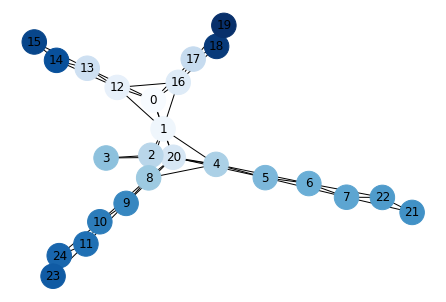

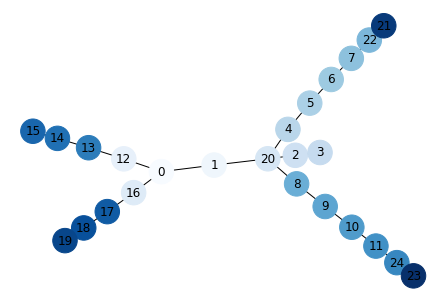

In [11]:
gm = nx.Graph()
gm.add_edges_from(g.edges)
gm.add_edges_from(g2.edges)
pos = nx.spring_layout(gm, iterations=100)
nx.draw(gm, pos, node_color=range(len(gm.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(gm, pos)
plt.show()
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

In [12]:
sk3 = power_adj(sk, 25, 3)

In [13]:
sk3

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
          2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
          6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
          9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14,
         14, 14, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19,
         20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 22, 22, 22, 23, 23, 24, 24, 24],
        [ 1,  2,  4,  8, 12, 14, 16, 18,  0,  3,  5,  9, 13, 17, 20,  0,  3,  5,
          9, 20,  1,  2,  4,  8,  0,  3,  5,  7,  9, 20,  1,  2,  4,  6,  8, 22,
          5,  7, 20, 21,  4,  6, 22,  0,  3,  5,  9, 11, 20,  1,  2,  4,  8, 10,
         24,  9, 11, 20, 23,  8, 10, 24,  0, 13, 15, 17, 20,  1, 12, 14, 16,  0,
         13, 15, 12, 14,  0, 13, 17, 19, 20,  1, 12, 16, 18,  0, 17, 19, 16, 18,
          1,  2,  4,  6,  8, 10, 12, 16,  6, 22,  5,  7, 21, 10, 24,  9, 11, 23]])

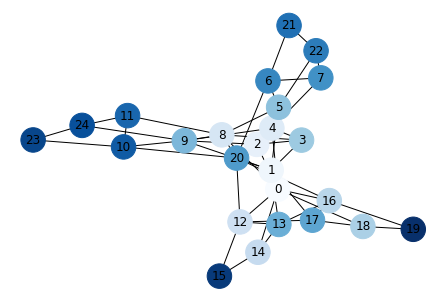

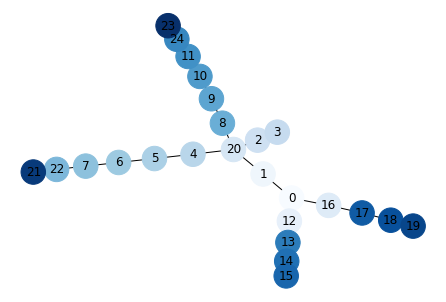

In [15]:
g3 = pyg.data.Data(edge_index=sk3)
t = pyg.utils.to_networkx(g3)
g3 = nx.Graph()
g3.add_edges_from(t.edges)
pos = nx.spring_layout(g3, iterations=100)
nx.draw(g3, pos, node_color=range(len(g3.nodes)), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g3, pos)
plt.show()
pos = nx.spring_layout(g, iterations=200)
nx.draw(g, pos, node_color=range(25), node_size=600, cmap=plt.cm.Blues)
labels = nx.draw_networkx_labels(g, pos)
plt.show()

In [1]:
from argparse import ArgumentParser

import torch
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch_geometric.data import DataLoader

from data.dataset3 import SkeletonDataset
from models.net import DualGraphTransformer
from tqdm import tqdm

import os.path as osp
import os
from torchviz import make_dot

In [3]:
ds = SkeletonDataset(root=osp.join(os.getcwd(), 'dataset', 'ntu_60'),
                     name='ntu_60',
                     benchmark='xsub',
                     sample='val')

loader = DataLoader(ds, batch_size=8, shuffle=True)
c = ds[0].x.shape[-1]

processed the adjacency matrices of skeleton


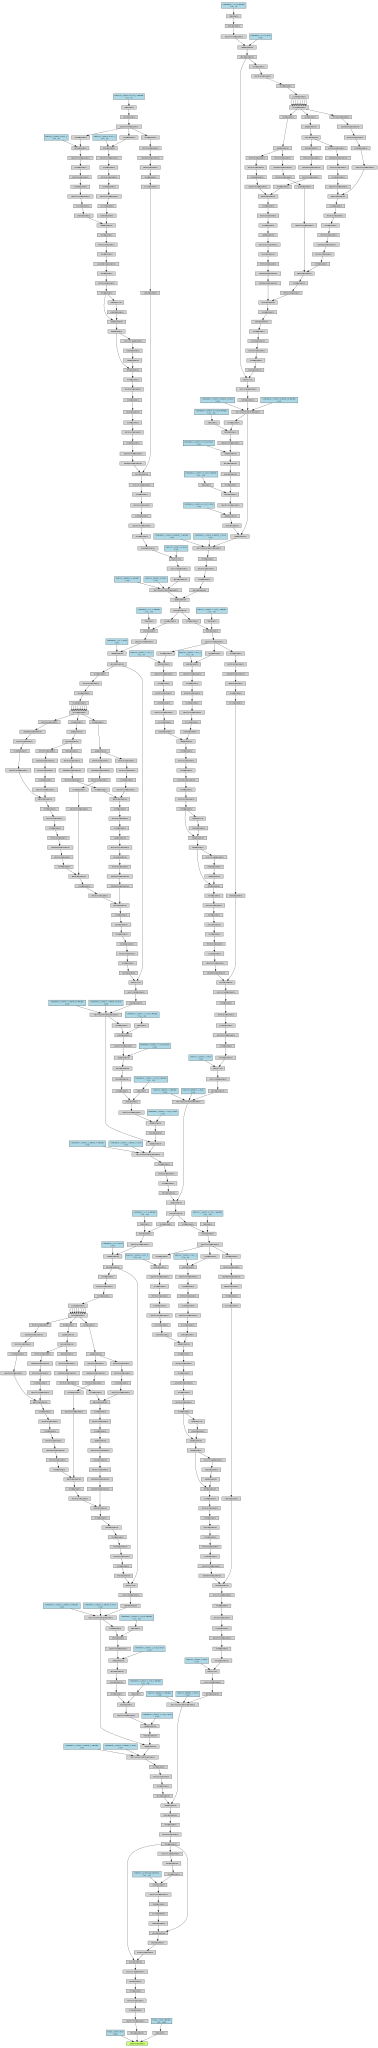

In [4]:
lt = DualGraphTransformer(in_channels=c,
                          hidden_channels=16,
                          out_channels=16,
                          sequential=False,
                          num_layers=3)

b = next(iter(loader))

make_dot(lt(b.x, ds.skeleton_, b.batch), params=dict(lt.named_parameters()))